In [1]:
from sirum.models import sir_model
import numpy as np

%load_ext autoreload
%autoreload 2

## Stable beta

In [2]:
beta_0 = 0.9
gamma = 1./10 
N = 15000000

In [3]:
sir = sir_model.SIR(beta_0=beta_0, gamma=gamma, N=N)

In [4]:
I_0, R_0 = 100, 0
S_0 = N - I_0 - R_0
days = 90

In [5]:
sir.solve_ODE(Initial_val = [S_0,I_0,R_0], days=days)

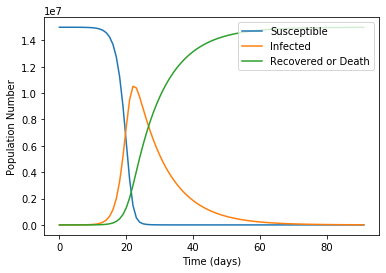

In [6]:
sir.plot()

## Variable beta

In [7]:
beta_changepoints = [(10, 0.7),
                     (16, lambda x: np.maximum(0.5 - 0.02*(x-x[0]), 0.2)),
                     (40, lambda x: np.minimum(0.5 + 0.02*(x-x[0]), beta_0)) ]

In [8]:
sir = sir_model.SIR(beta_0=beta_0, beta_changepoints=beta_changepoints, gamma=gamma, N=N)

In [9]:
sir.solve_ODE(Initial_val = [S_0,I_0,R_0], days=days)

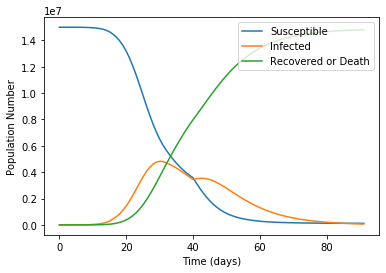

In [10]:
sir.plot()